In [1]:
from jaeger_parser import JaegerParser
from graphviz import Digraph
import json
import sys

In [2]:
def index_of(x, y):
    #print("IN INDEXOF with %d items" % len(y))
    for idx, val in enumerate(sorted(map(lambda q: int(q), y))):
        # assumes values to be unique!! ono
        #print("compare %s to %s" % (val, x))
        if val == int(x):
            return idx

#make directed graph by instantiating an object of Digraph class
def draw_graph(tree, name, rule=[]):
    dot = Digraph(name)
    tree.todot(dot, rule)
    return dot


In [3]:
#instantiate an object of JaegerParser class and parse trace
p = JaegerParser("trace.json")
p.process()

#list of things we want to preserve
crule = ['serviceName']

lbls = p.root.label_values()


In [4]:
#draw the raw graph - identity function preserves entire graph structure
rules_raw = {
    'transform' : {
        'spanID' : lambda x, y : x,
        'operationName' : lambda x, y : x,
        'serviceName' : lambda x, y : x,
    },
    'excise': {
        'serviceName' : lambda x : x.startswith("istio-mixer")
    }
}

#draw_graph(p.root.transform(rules_raw, lbls).collapse(), 'original raw', [])


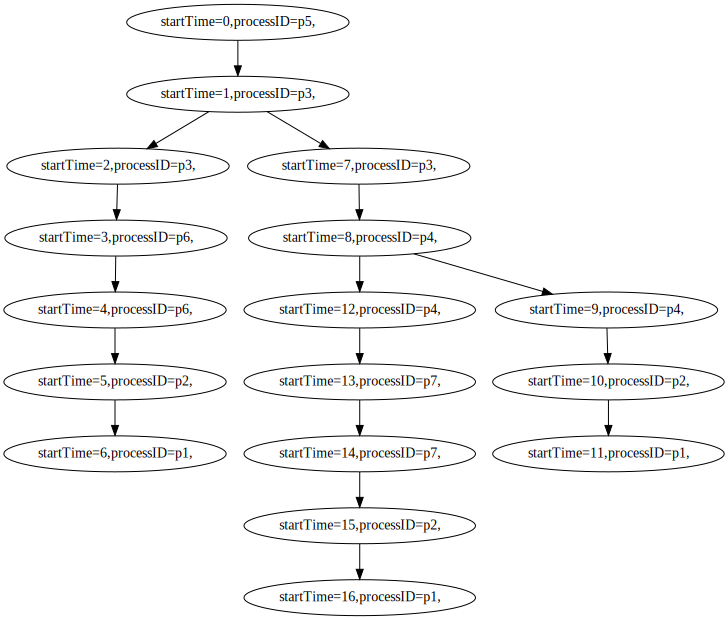

In [5]:
rules_pid = {
    #'operationName' : lambda x, y : '' if x.startswith('async') or x.startswith('/istio') or x.startswith('kubernetes') else x,
    'processID' : lambda x, y : x,
    'startTime' : index_of
}

draw_graph(p.root.transform(rules_pid, lbls).collapse(), "raw.png", [])

In [6]:
rules_duration = {
    'duration' : lambda x, y : x
}

#draw_graph(p.root.transform(rules_duration, lbls), 'duration', [])

In [7]:
#project down to serviceName, classic LDFI style
#all nodes with service name preserved
#all nodes without service name mapped to False (excised)
rules1 = {
    'transform' : {
        'serviceName' : lambda x, y : x if not x.startswith("istio-mixer") else "",
    },
    'excise': {
        'serviceName' : lambda x: x.startswith("istio-mixer")
    }
}

#draw_graph(p.root.transform(rules1), "ldfi-raw", crule)

serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!
serviceName is missing from map!


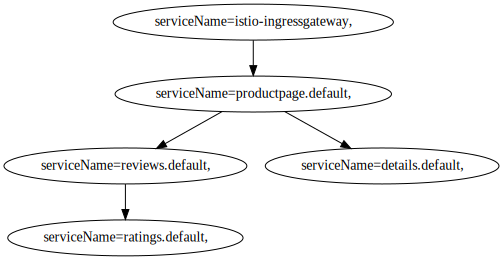

In [8]:
#step 2: collapse adjacent nodes with identical labels
#collapsing graph transfomed by new set of rules
#collapse function comes from callgraph class
draw_graph(p.root.transform(rules1).collapse(), "ldfi-clean", crule)

In [9]:
#remember timing information as well
rules2 = {
    'transform' : {
        'serviceName' : lambda x, y : x,
        'startTime' : index_of,
        'duration' : lambda x, y : x,
    },
    'excise': {
        'serviceName' : lambda x : x.startswith("istio-mixer")
    }
}

#draw_graph(p.root.transform(rules2).collapse(), "ldfi2-raw", [])

In [10]:
# but 'forget' timing information during collapse, projecting down to service name.
#draw_graph(p.root.transform(rules2).collapse(["serviceName"]), "ldfi2-clean", [])

processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!
processID is missing from map!


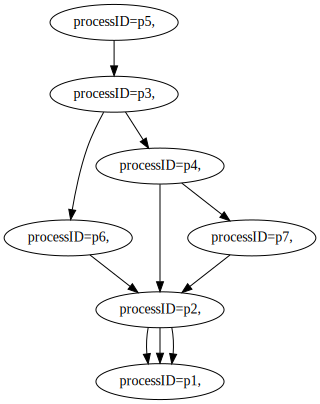

In [11]:
rules_processID = {
    'processID' : lambda x, y : x
}

draw_graph(p.root.transform(rules_processID).collapse(), 'processID', [])

In [12]:
rules_opname = {
    'operationName' : lambda x, y : '' if x.startswith('async') or x.startswith('/istio') or x.startswith('kubernetes') else x,
}

#draw_graph(p.root.transform(rules_opname, lbls).collapse(), 'operationName', [])

In [13]:
rules_opname_pid = {
    'operationName' : lambda x, y : '' if x.startswith('async') or x.startswith('/istio') or x.startswith('kubernetes') else x,
    'processID' : lambda x, y : x,
    'startTime' : index_of
}

#draw_graph(p.root.transform(rules_opname_pid, lbls).collapse(), 'operationName with pID', [])

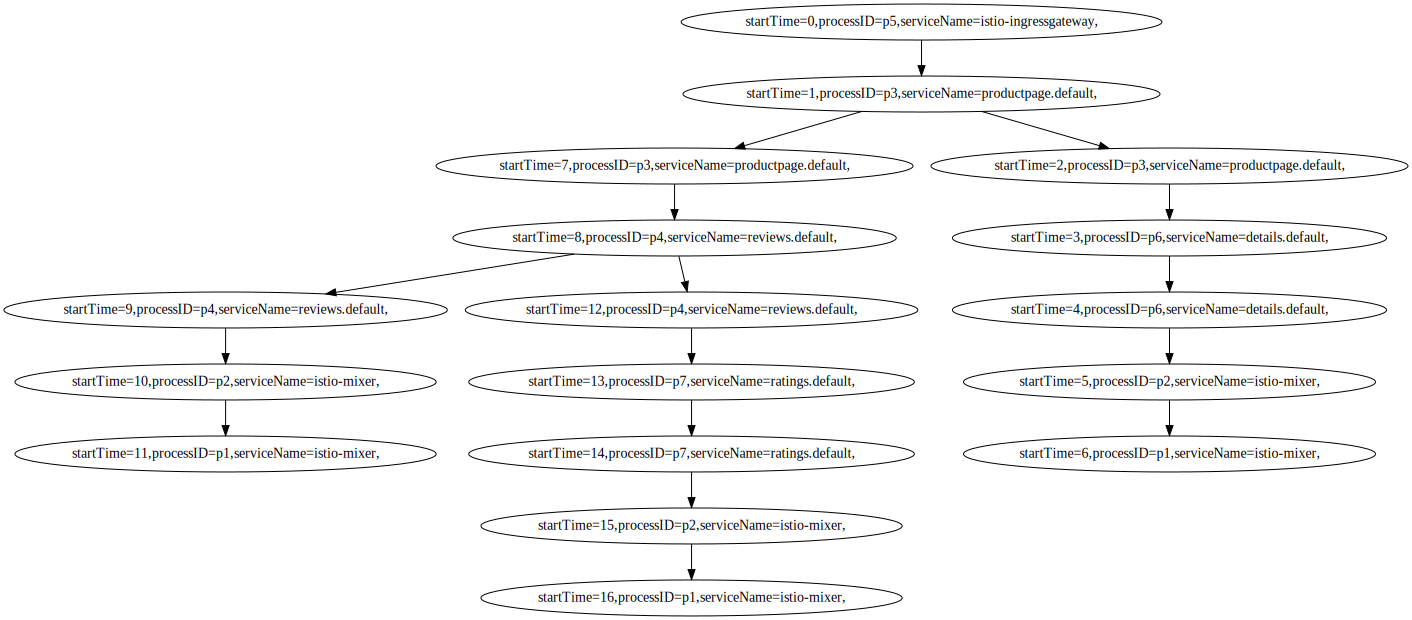

In [14]:
rules_pid_servicename = {
    'processID' : lambda x, y : x,
    'startTime' : index_of,
    'serviceName' : lambda x, y : x,
}    

draw_graph(p.root.transform(rules_pid_servicename, lbls).collapse(), 'pID, start time and service name', [])

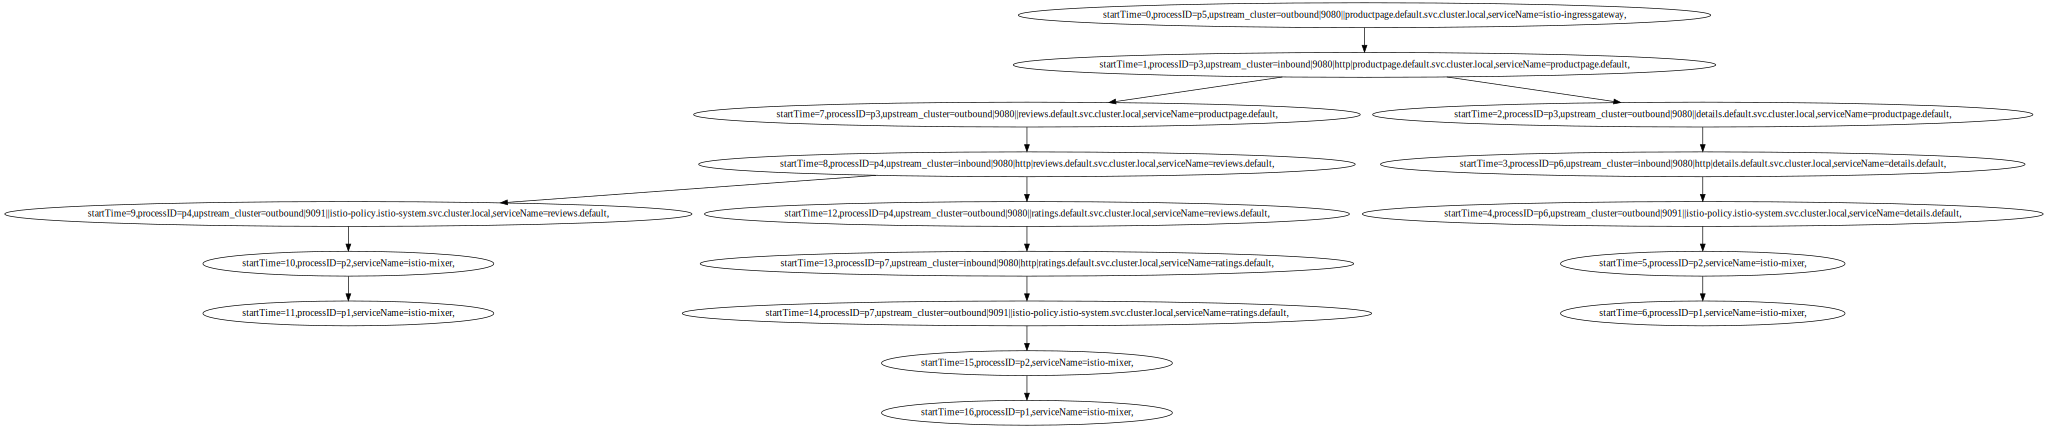

In [15]:
rules_pid_servicename_upstreamcluster = {
    'processID' : lambda x, y : x,
    'startTime' : index_of,
    'serviceName' : lambda x, y : x,
    'upstream_cluster' : lambda x, y : x
}    

draw_graph(p.root.transform(rules_pid_servicename_upstreamcluster, lbls).collapse(), 'pID, start time, service name and upstream cluster', [])

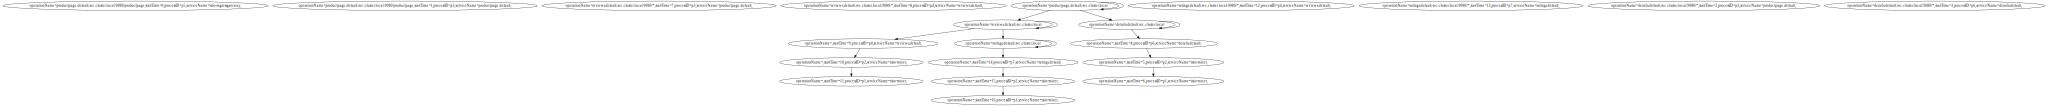

In [16]:
rules_opname_pid_servicename = {
    'operationName' : lambda x, y : '' if x.startswith('async') or x.startswith('/istio') or x.startswith('kubernetes') else x,
    'processID' : lambda x, y : x,
    'startTime' : index_of,
    'serviceName' : lambda x, y : x,
    #'upstream_cluster' : lambda x, y : x
}    

draw_graph(p.root.transform(rules_opname_pid_servicename, lbls).collapse(), 'operationName with pID, start time and service name', [])

node_id is missing from map!
node_id is missing from map!
node_id is missing from map!
node_id is missing from map!
node_id is missing from map!
node_id is missing from map!
node_id is missing from map!
node_id is missing from map!


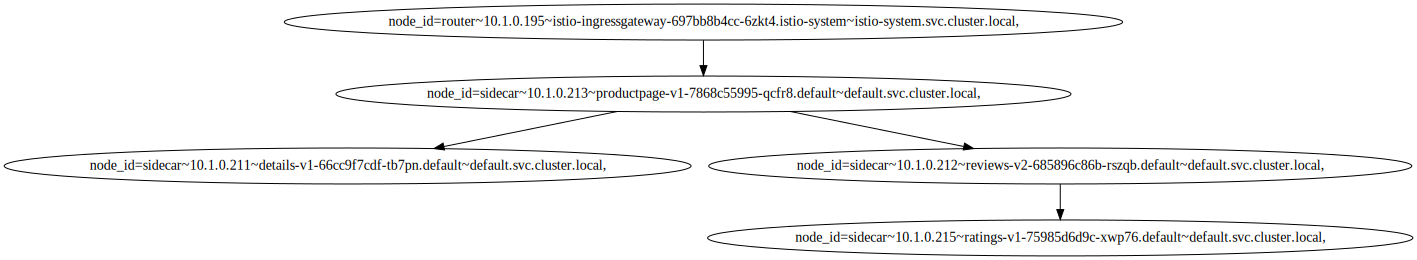

In [17]:
rules_nodeID = {
    'node_id' : lambda x, y : x,
}

draw_graph(p.root.transform(rules_nodeID).collapse(), "nodeID", [])

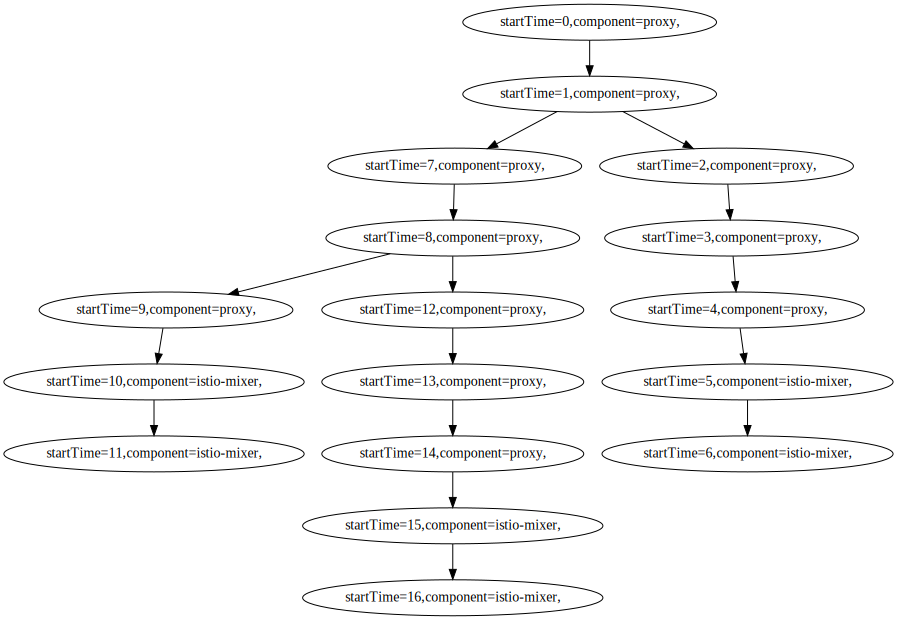

In [18]:
rules_component = {
    'component' : lambda x, y : x,
    'startTime' : index_of
}

draw_graph(p.root.transform(rules_component, lbls), "component", [])

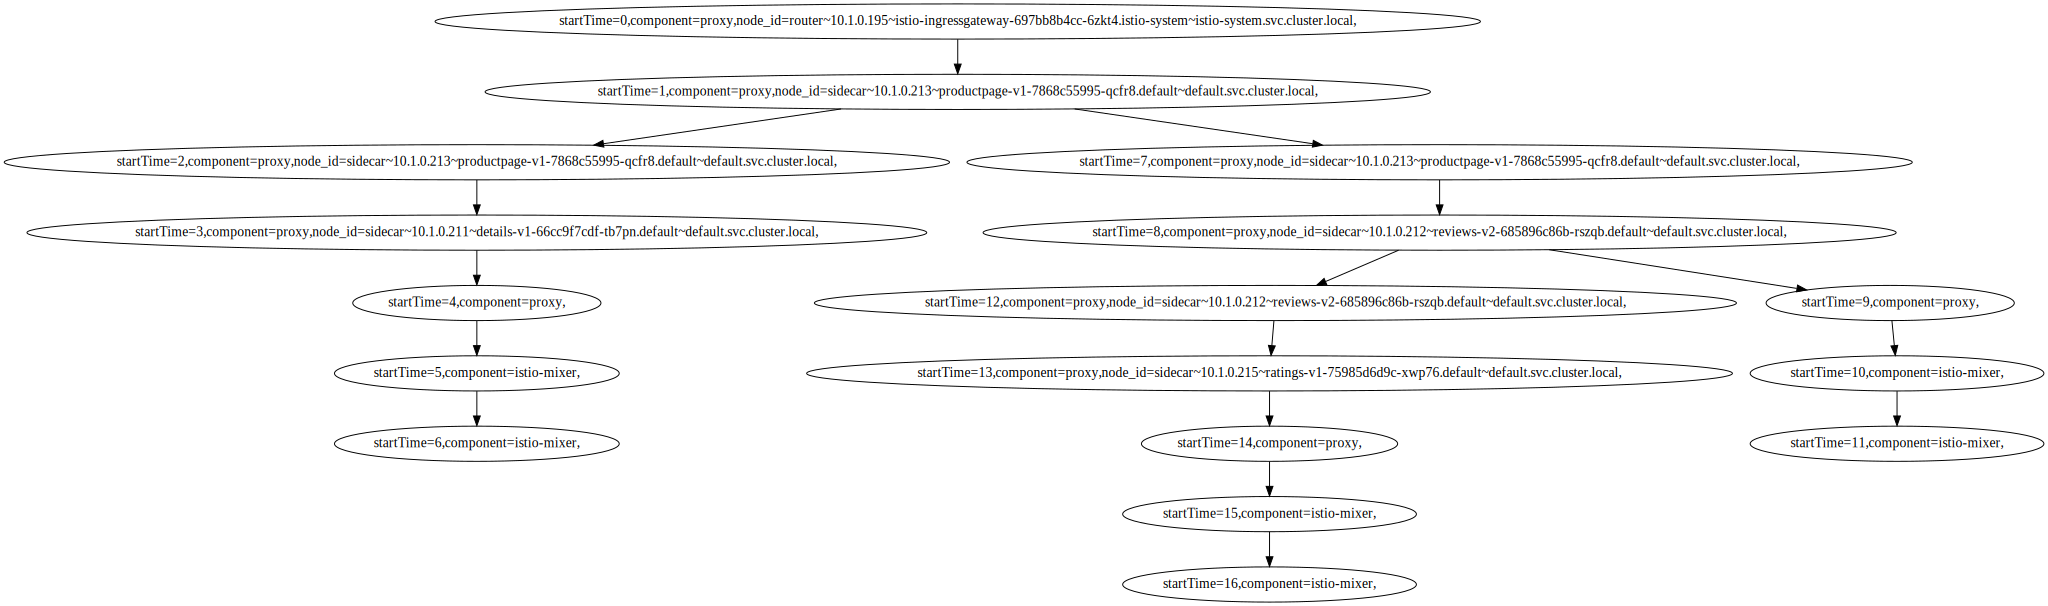

In [19]:
rules_component_nodeID = {
    'component' : lambda x, y : x,
    'node_id' : lambda x, y : '' if x.startswith('istio') else x,
    'startTime' : index_of
}

draw_graph(p.root.transform(rules_component_nodeID, lbls), "component with nodeID", [])

spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!
spanID is missing from map!


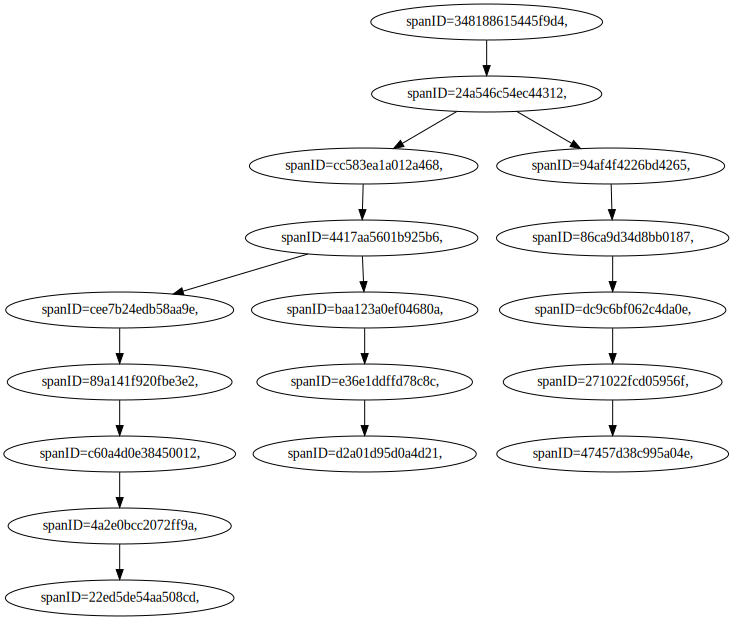

In [20]:
rules_spanID = {
    'spanID' : lambda x, y : x,
}

draw_graph(p.root.transform(rules_spanID), "spanID", [])

In [21]:
rules_spankind = {
    'span.kind' : lambda x, y : x,
    #'startTime' : index_of
}

#draw_graph(p.root.transform(rules_spankind, lbls).collapse(), 'spankind', [])

In [22]:
rules_responsesize = {
    'response_size' : lambda x, y : x if x.startswith('') else ''
}

#draw_graph(p.root.transform(rules_responsesize, lbls).collapse(), 'response size', [])

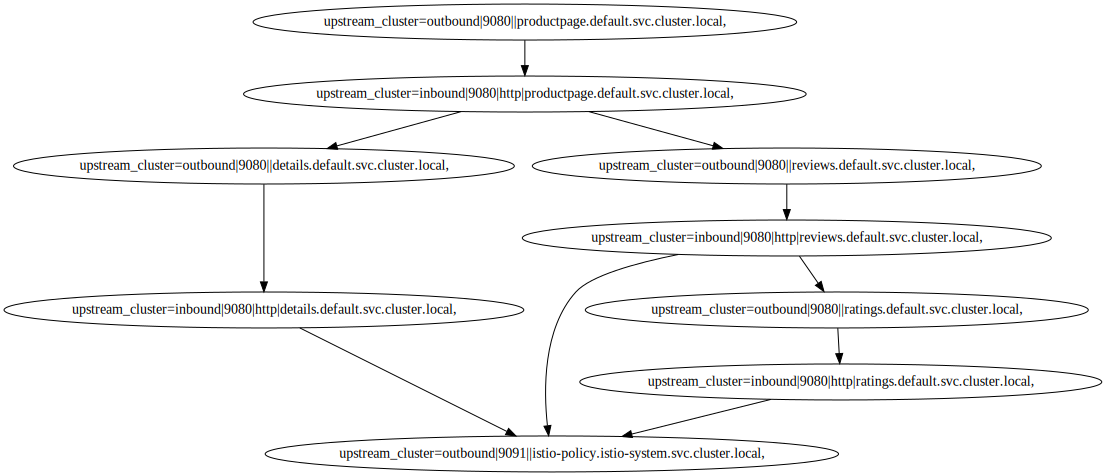

In [23]:
rules_upstreamcluster = {
    'upstream_cluster' : lambda x, y : x
}

draw_graph(p.root.transform(rules_upstreamcluster, lbls).collapse(), 'upstream cluster', [])

In [24]:
rules_ust = {
    'upstream_cluster': lambda x, y : x,
    'startTime' : index_of,
    'span.kind' : lambda x, y : x
}

#draw_graph(p.root.transform(rules_ust, lbls), 'upstream cluster, span kind and start time', [])

In [25]:
rules_us = {
    'upstream_cluster': lambda x, y : x,
    #'startTime' : index_of,
    'span.kind' : lambda x, y : x
}

#draw_graph(p.root.transform(rules_us, lbls), 'upstream cluster and span kind', [])

In [26]:
rules_uc = {
    'upstream_cluster' : lambda x, y : x,
    'component' : lambda x, y : x
}

#draw_graph(p.root.transform(rules_uc, lbls), 'upstream cluster and component', [])

In [27]:
rules_up = {
    'upstream_cluster' : lambda x, y : x,
    'processID' : lambda x, y : x
}

#draw_graph(p.root.transform(rules_up, lbls), 'upstream cluster and process ID', [])

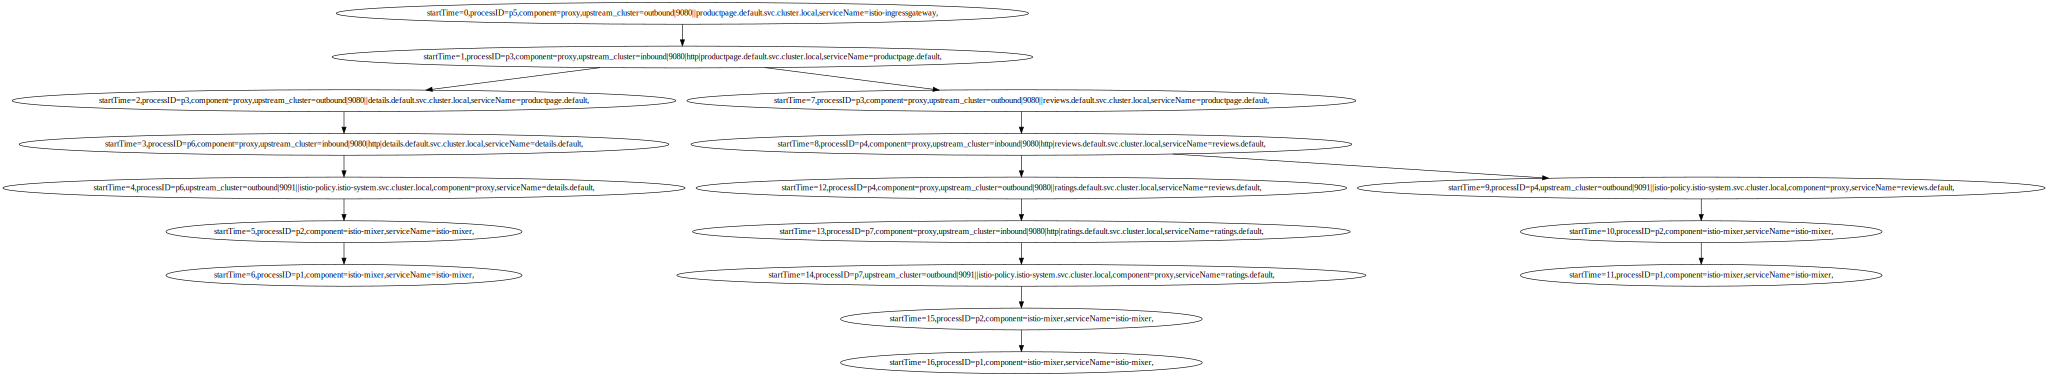

In [28]:
rules_upc = {
    'serviceName' : lambda x, y : x,
    'component' : lambda x, y : x,
    'processID' : lambda x, y : x,
    'upstream_cluster' : lambda x, y : x,
    'startTime' : index_of
}

display(draw_graph(p.root.transform(rules_upc, lbls), 'service name, upstream cluster, component, process ID, start time', []))

In [29]:
#finally, create some formulae that we can pass into LDFI
collapsed = p.root.transform(rules2).collapse(crule)
#print(str(collapsed))
#f = collapsed.formula(crule)
#print("FORM " + str(f))

lbls = p.root.label_values()
for k in lbls:
    print(k)
    for v in lbls[k]:
        print("\t %s" % v)

startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!
serviceName is missing from map!
startTime is missing from map!
duration is missing from map!